In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
!pip install -U matplotlib
!pip install -U font-manager

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: Could not find a version that satisfies the requirement font-manager (from versions: none)
ERROR: No matching distribution found for font-manager


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import scipy
import seaborn as sns
import matplotlib.font_manager as fm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings


Bad key text.latex.preview in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [2]:
warnings.simplefilter('ignore')

In [3]:
font_path = "C:\\Users\\spa84\\Downloads\\text_mining\\NanumGothic.ttf"  # 나눔 폰트의 경로를 지정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)

In [4]:
path = './data/'

df = pd.read_csv(path+'distance_merged.csv')

In [5]:
df

,Region_Name,Building_Age,Building_Use,JS_Price,JS_BA,Population,IR,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Sell_Price,Crime_Rates,Shortest_Distance_to_Subway,Shortest_Distance_to_School,Shortest_Distance_to_Univ,YearMonth,Shortest_Distance_to_Park
0,성동구,19,아파트,22000,59.97,292786.00,2.00,3.0,81.4,86.6,84.9,115.756491,77.5,38683.33,1.178712,555.986308,295.569643,1339.504535,201411,1028.419509
1,도봉구,18,아파트,16000,84.98,357523.33,3.00,4.3,72.5,78.6,74.9,106.866464,81.7,29800.00,0.848460,2027.675179,149.315861,765.750961,201103,627.870957
2,송파구,35,아파트,21000,46.54,654241.00,1.75,3.7,83.7,88.0,86.0,120.348837,80.9,68855.00,1.015461,255.774896,472.015224,2129.795311,201505,1405.703845
3,노원구,24,아파트,13000,59.28,588021.80,3.25,3.3,72.7,79.5,76.5,108.376186,80.1,23250.00,0.906348,283.565040,291.020714,517.741729,201107,1015.223086
4,관악구,14,아파트,34000,84.87,508137.00,2.50,4.5,79.2,85.6,82.7,121.038496,75.7,40303.85,1.274720,556.539907,273.268241,989.162559,201402,944.475850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,강서구,18,오피스텔,17000,28.45,567898.00,1.75,3.0,108.8,108.0,109.1,94.156094,180.2,27150.00,0.671993,1733.008129,386.728023,1161.499230,202206,29.148712
2996,노원구,27,아파트,15000,39.82,543267.00,1.50,4.1,93.8,98.1,94.4,89.535769,107.4,29095.45,0.730991,769.700633,196.588060,694.360317,201804,1469.233740
2997,성동구,15,아파트,25000,84.91,294446.00,2.75,3.2,76.1,82.6,80.3,114.344638,73.7,34142.86,1.084889,289.844463,129.800930,1369.175383,201304,527.038587
2998,영등포구,15,아파트,110000,156.66,366258.00,0.50,4.5,98.5,98.3,99.5,104.100145,135.1,157500.00,1.280663,174.634578,274.653099,3134.071537,202005,444.209048


## Categorical:

- Nominal(variables that have two or more categories, but which do not have an intrinsic order.)

    - Region_Name : 자치구 명
    - Building_Use : 건물 용도
    
- Ordinal(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)

    
## Numeric:

- Discrete
    - YearMonth : 년월
    - Building_Age : 건물연식
    - JS_Price : 전세가
   
- Continous
    - Sell_Price : 매매 가격
    - JS_BA = JS_Building Area : 임대 면적
    - lR = Interest Rate : 금리
    - UR = Unemployment Rate : 실업률
    - LC_index = Leading Composite index : 선행종합 지수
    - CA_index = Comprehensive Accompany index : 동행종합 지수
    - TC_index = Trailing Composite index : 후행종합 지수
    - SDT_index = Supply and Demand Trend index = 전세수급동향 지수
    - HSP_index = 
    - Population : 인구수
    - Crime_Rates : 범죄율
    - Shortest_Distance_to_Subway : 가장 가까운 지하철역과의 거리
    - Shortest_Distance_to_School : 가장 가까운 초중고등학교와의 거리
    - Shortest_Distance_to_Univ : 가장 가까운 대학교와의 거리
    - Shortest_Distance_to_Park : 가장 가까운 공원과의 거리
    

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Region_Name                  3000 non-null   object 
 1   Building_Age                 3000 non-null   int64  
 2   Building_Use                 3000 non-null   object 
 3   JS_Price                     3000 non-null   int64  
 4   JS_BA                        3000 non-null   float64
 5   Population                   3000 non-null   float64
 6   IR                           3000 non-null   float64
 7   UR                           3000 non-null   float64
 8   LC_index                     3000 non-null   float64
 9   CA_index                     3000 non-null   float64
 10  TC_index                     3000 non-null   float64
 11  SDT_index                    3000 non-null   float64
 12  HSP_index                    3000 non-null   float64
 13  Sell_Price        

## Feature_Scaling

In [7]:
# Min-Max 스케일러 생성
scaler = MinMaxScaler()

# 정규화할 열 선택 (수치형 데이터만)
numeric_columns = df.select_dtypes(include=['float', 'int']).columns

# 데이터 정규화
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [8]:
def target_encoding(df, categorical_columns, target_column):
    for categorical_column in categorical_columns:
        encoding_map = df.groupby(categorical_column)[target_column].mean().to_dict()
        df[categorical_column + '_encoded'] = df[categorical_column].map(encoding_map)
        df.drop(columns=[categorical_column], inplace=True)
    return df

# 범주형 변수 리스트 지정
categorical_columns = ['YearMonth', 'Building_Use']
target_column = 'JS_Price'

# 타겟 인코딩 적용
df_encoded = target_encoding(df, categorical_columns, target_column)

In [9]:
df_encoded

,Region_Name,Building_Age,JS_Price,JS_BA,Population,IR,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Sell_Price,Crime_Rates,Shortest_Distance_to_Subway,Shortest_Distance_to_School,Shortest_Distance_to_Univ,Shortest_Distance_to_Park,YearMonth_encoded,Building_Use_encoded
0,성동구,0.384615,0.089503,0.204268,0.315685,0.545455,0.250000,0.249337,0.269231,0.280105,0.724526,0.046392,0.048978,0.191649,0.107947,0.219561,0.186003,0.316267,0.126895,0.163157
1,도봉구,0.365385,0.062983,0.312093,0.433421,0.909091,0.611111,0.013263,0.012821,0.018325,0.586711,0.082474,0.035159,0.091333,0.393681,0.101239,0.104835,0.189494,0.087664,0.163157
2,송파구,0.692308,0.085083,0.146368,0.973053,0.454545,0.444444,0.310345,0.314103,0.308901,0.795718,0.075601,0.095916,0.142061,0.049660,0.362307,0.297803,0.435677,0.177753,0.163157
3,노원구,0.480769,0.049724,0.201293,0.852622,1.000000,0.333333,0.018568,0.041667,0.060209,0.610115,0.068729,0.024969,0.108917,0.055055,0.215880,0.069750,0.312091,0.088177,0.163157
4,관악구,0.288462,0.142541,0.311619,0.707338,0.727273,0.666667,0.190981,0.237179,0.222513,0.806409,0.030928,0.051499,0.220812,0.108054,0.201518,0.136441,0.289699,0.103448,0.163157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,강서구,0.365385,0.067403,0.068377,0.816023,0.454545,0.250000,0.976127,0.955128,0.913613,0.389672,0.928694,0.031036,0.037731,0.336470,0.293309,0.160821,0.000000,0.172305,0.086470
2996,노원구,0.538462,0.058564,0.117396,0.771228,0.363636,0.555556,0.578249,0.637821,0.528796,0.318046,0.303265,0.034063,0.055652,0.149440,0.139483,0.094736,0.455784,0.141191,0.163157
2997,성동구,0.307692,0.102762,0.311791,0.318704,0.818182,0.305556,0.108753,0.141026,0.159686,0.702639,0.013746,0.041915,0.163150,0.056274,0.085452,0.190200,0.157581,0.094426,0.163157
2998,영등포구,0.307692,0.478453,0.621125,0.449306,0.000000,0.666667,0.702918,0.644231,0.662304,0.543827,0.541237,0.233821,0.222617,0.033906,0.202639,0.439876,0.131366,0.191810,0.163157


In [10]:
selected_regions = ['강남구', '서초구', '송파구']
df_encoded = df_encoded[df_encoded['Region_Name'].isin(selected_regions)]

In [11]:
df_encoded.drop('Region_Name', axis=1, inplace=True)

In [12]:
df_encoded

,Building_Age,JS_Price,JS_BA,Population,IR,UR,LC_index,CA_index,TC_index,SDT_index,HSP_index,Sell_Price,Crime_Rates,Shortest_Distance_to_Subway,Shortest_Distance_to_School,Shortest_Distance_to_Univ,Shortest_Distance_to_Park,YearMonth_encoded,Building_Use_encoded
2,0.692308,0.085083,0.146368,0.973053,0.454545,0.444444,0.310345,0.314103,0.308901,0.795718,0.075601,0.095916,0.142061,0.049660,0.362307,0.297803,0.435677,0.177753,0.163157
12,0.596154,0.135912,0.088769,0.733972,0.727273,0.083333,0.992042,0.993590,0.958115,0.309166,0.789519,0.131923,0.180168,0.184793,0.282610,0.654604,0.512394,0.208591,0.163157
13,0.288462,0.562431,0.309377,0.733972,0.727273,0.000000,0.981432,0.987179,0.945026,0.289244,0.823024,0.424393,0.178723,0.107264,0.183760,0.214864,0.199717,0.215122,0.163157
14,0.038462,0.390055,0.204268,0.749964,0.272727,0.361111,0.689655,0.733974,0.651832,0.666900,0.512027,0.348164,0.236842,0.057249,0.110403,0.745790,0.331348,0.205902,0.163157
17,0.750000,0.434254,0.602716,0.747328,0.090909,0.583333,0.702918,0.701923,0.659686,0.609544,0.546392,0.361388,0.244307,0.155841,0.144761,0.164007,0.290895,0.163163,0.163157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,0.153846,0.332597,0.312136,0.739043,0.000000,0.305556,0.931034,0.826923,0.772251,0.790042,0.941581,0.262601,0.180742,0.308341,0.096146,0.747359,0.174920,0.175368,0.163157
2981,0.673077,0.319337,0.309937,0.782374,0.272727,0.777778,0.477454,0.535256,0.431937,0.610933,0.162371,0.249456,0.251572,0.098773,0.160964,0.582151,0.605831,0.129342,0.163157
2984,0.038462,0.067403,0.028929,0.554229,0.454545,0.666667,0.604775,0.666667,0.589005,0.153199,0.393471,0.026991,0.220505,0.193781,0.439267,0.071748,0.542811,0.192002,0.086470
2993,0.250000,0.257459,0.699202,0.759977,0.363636,0.416667,0.599469,0.647436,0.554974,0.453720,0.424399,0.205040,0.250469,0.177513,0.330530,0.381893,0.382417,0.150217,0.163157


## DF 사전진단

### 선형패턴 확인

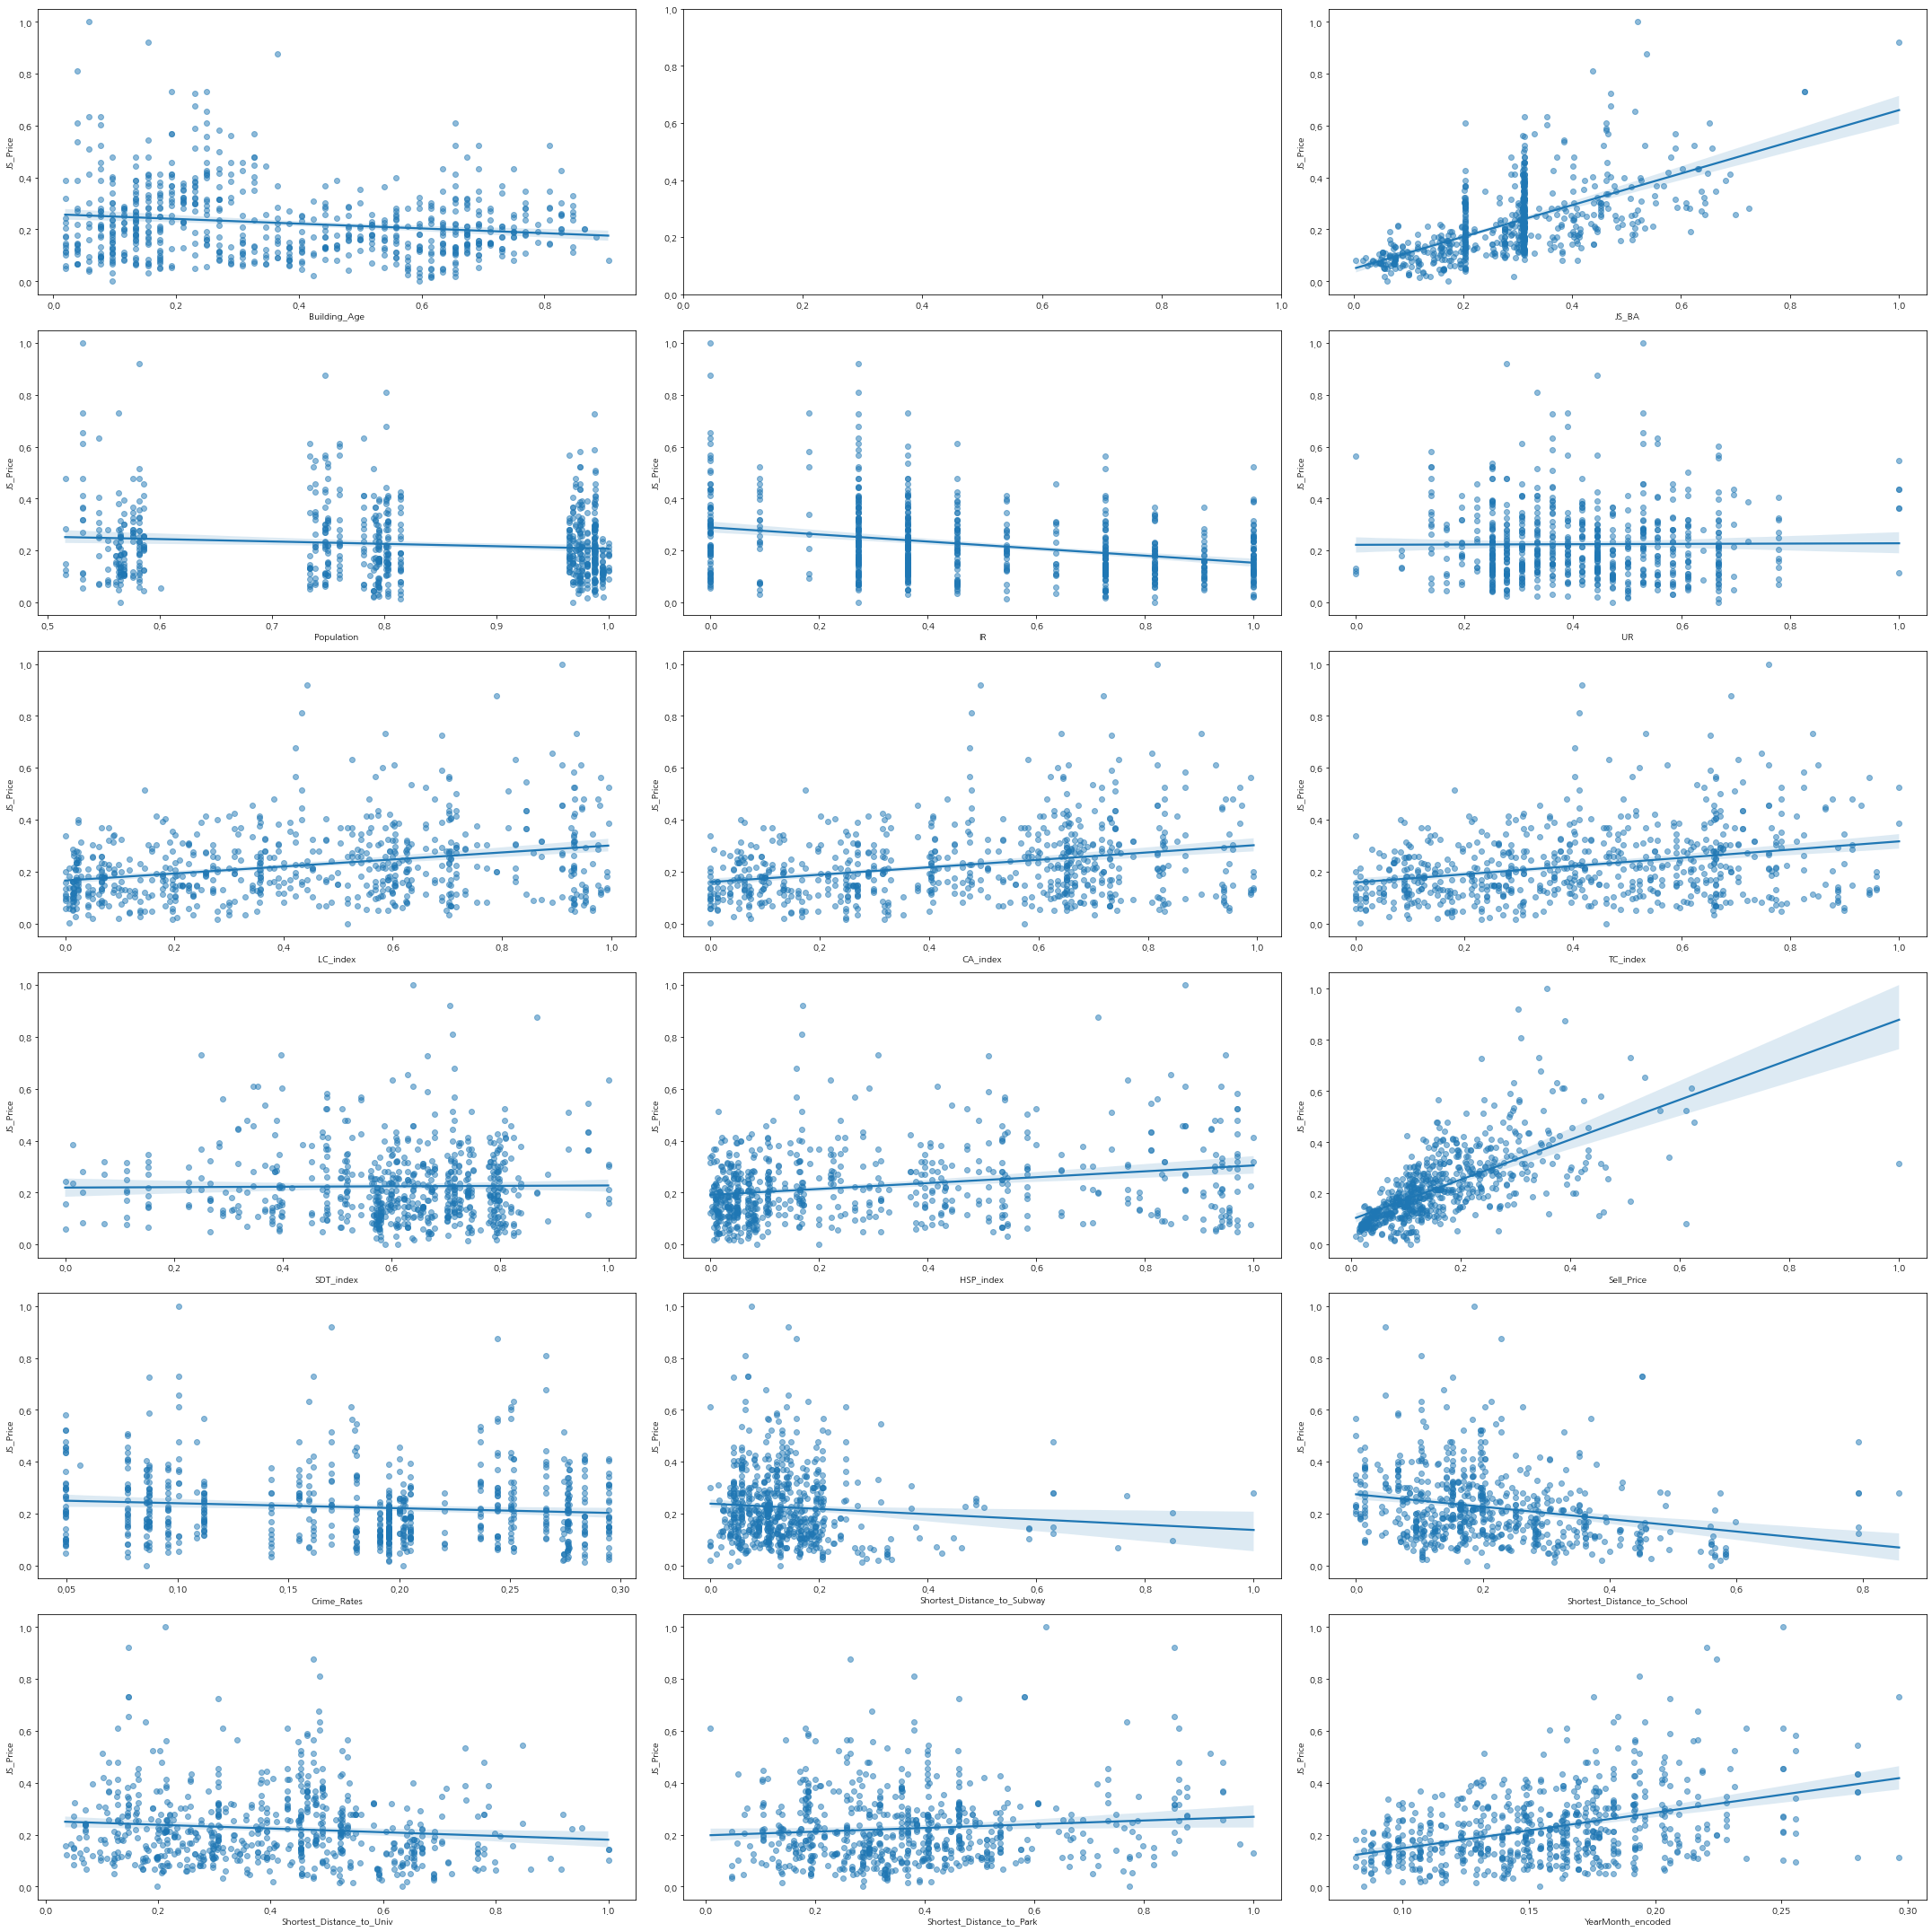

In [13]:
count = len(df_encoded.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30,30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

# 독립 변수와 종속 변수 간의 선형 관계 확인
for i, independent_column in enumerate(df_encoded.columns):
    if independent_column != 'JS_Price':
        if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
            sns.regplot(x=independent_column, y='JS_Price', data=df_encoded, ax=ax[i], scatter_kws={'alpha': 0.5})
            ax[i].set_xlabel(independent_column)
            ax[i].set_ylabel('JS_Price')

# 남은 subplot 비우기
for i in range(len(df_encoded.columns), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

## 이상치 확인

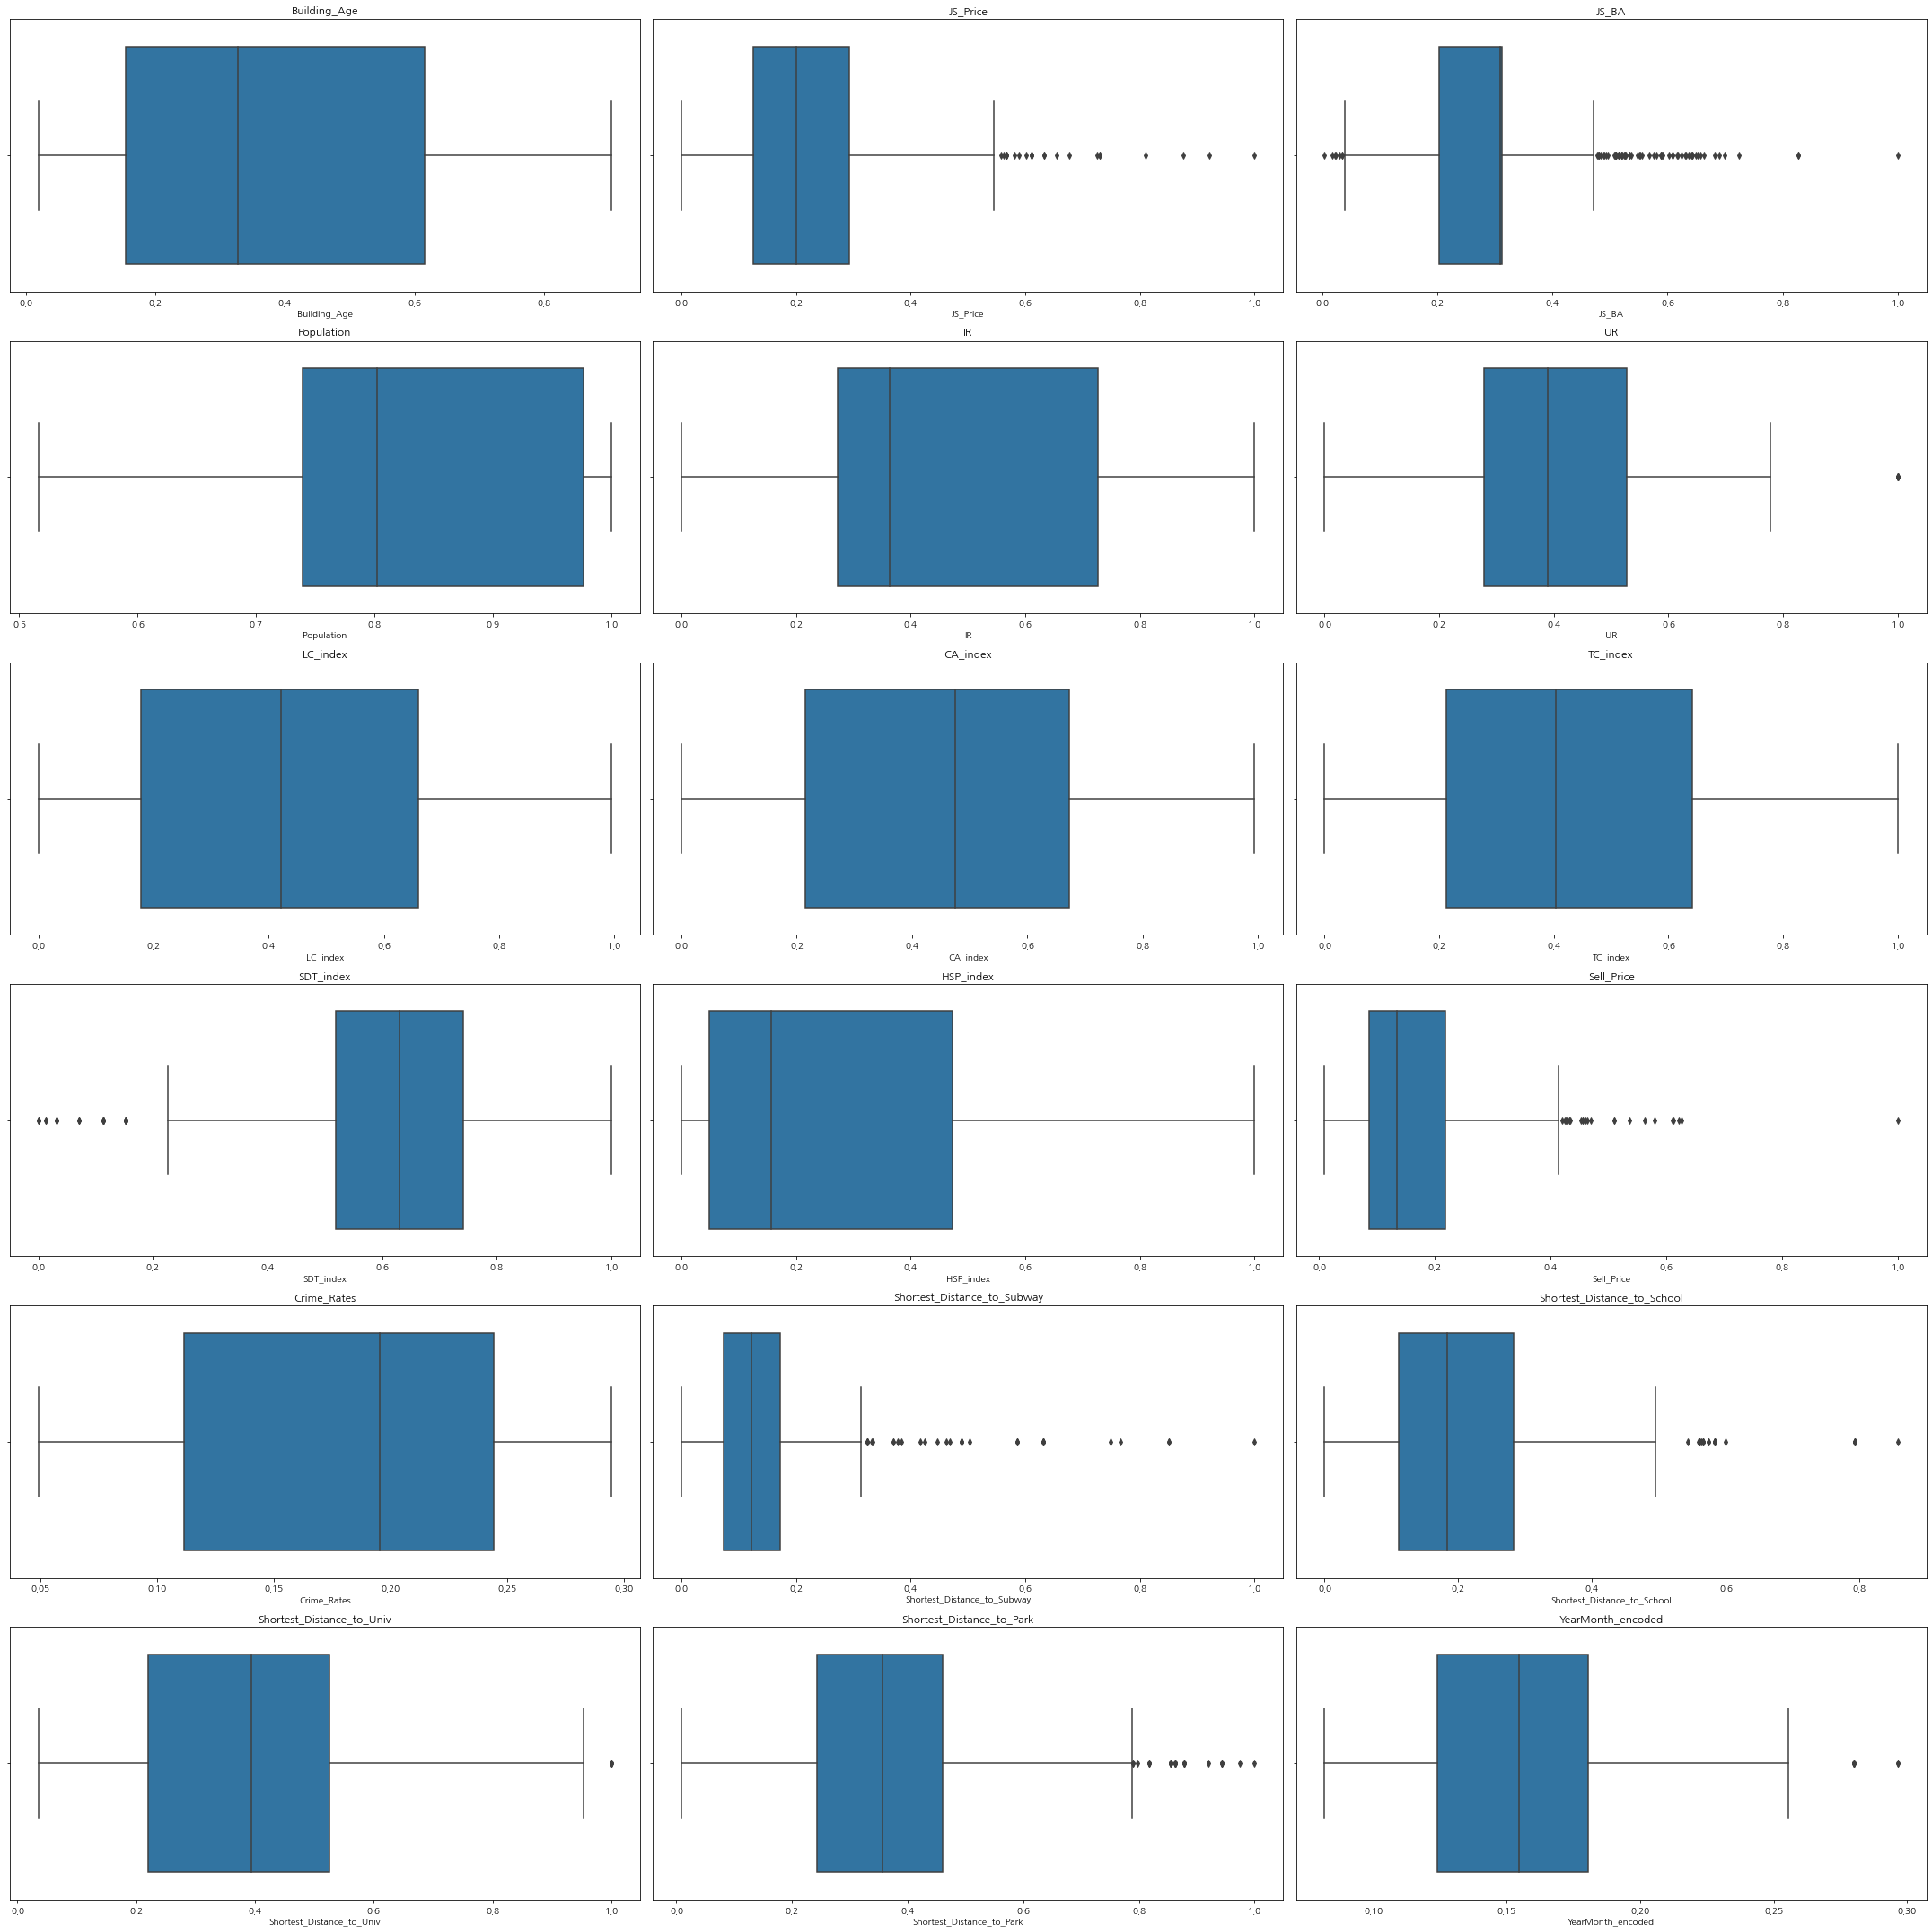

In [14]:
count = len(df_encoded.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30, 30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

# 그래프를 그릴 컬럼 목록
columns_to_plot = [column for column in df_encoded.columns]

for i, column in enumerate(columns_to_plot):
    if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
        sns.boxplot(x=column, data=df_encoded, ax=ax[i], orient='v')
        ax[i].set_title(column)

# 남은 subplot 비우기
for i in range(len(columns_to_plot), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

### 정규성 확인

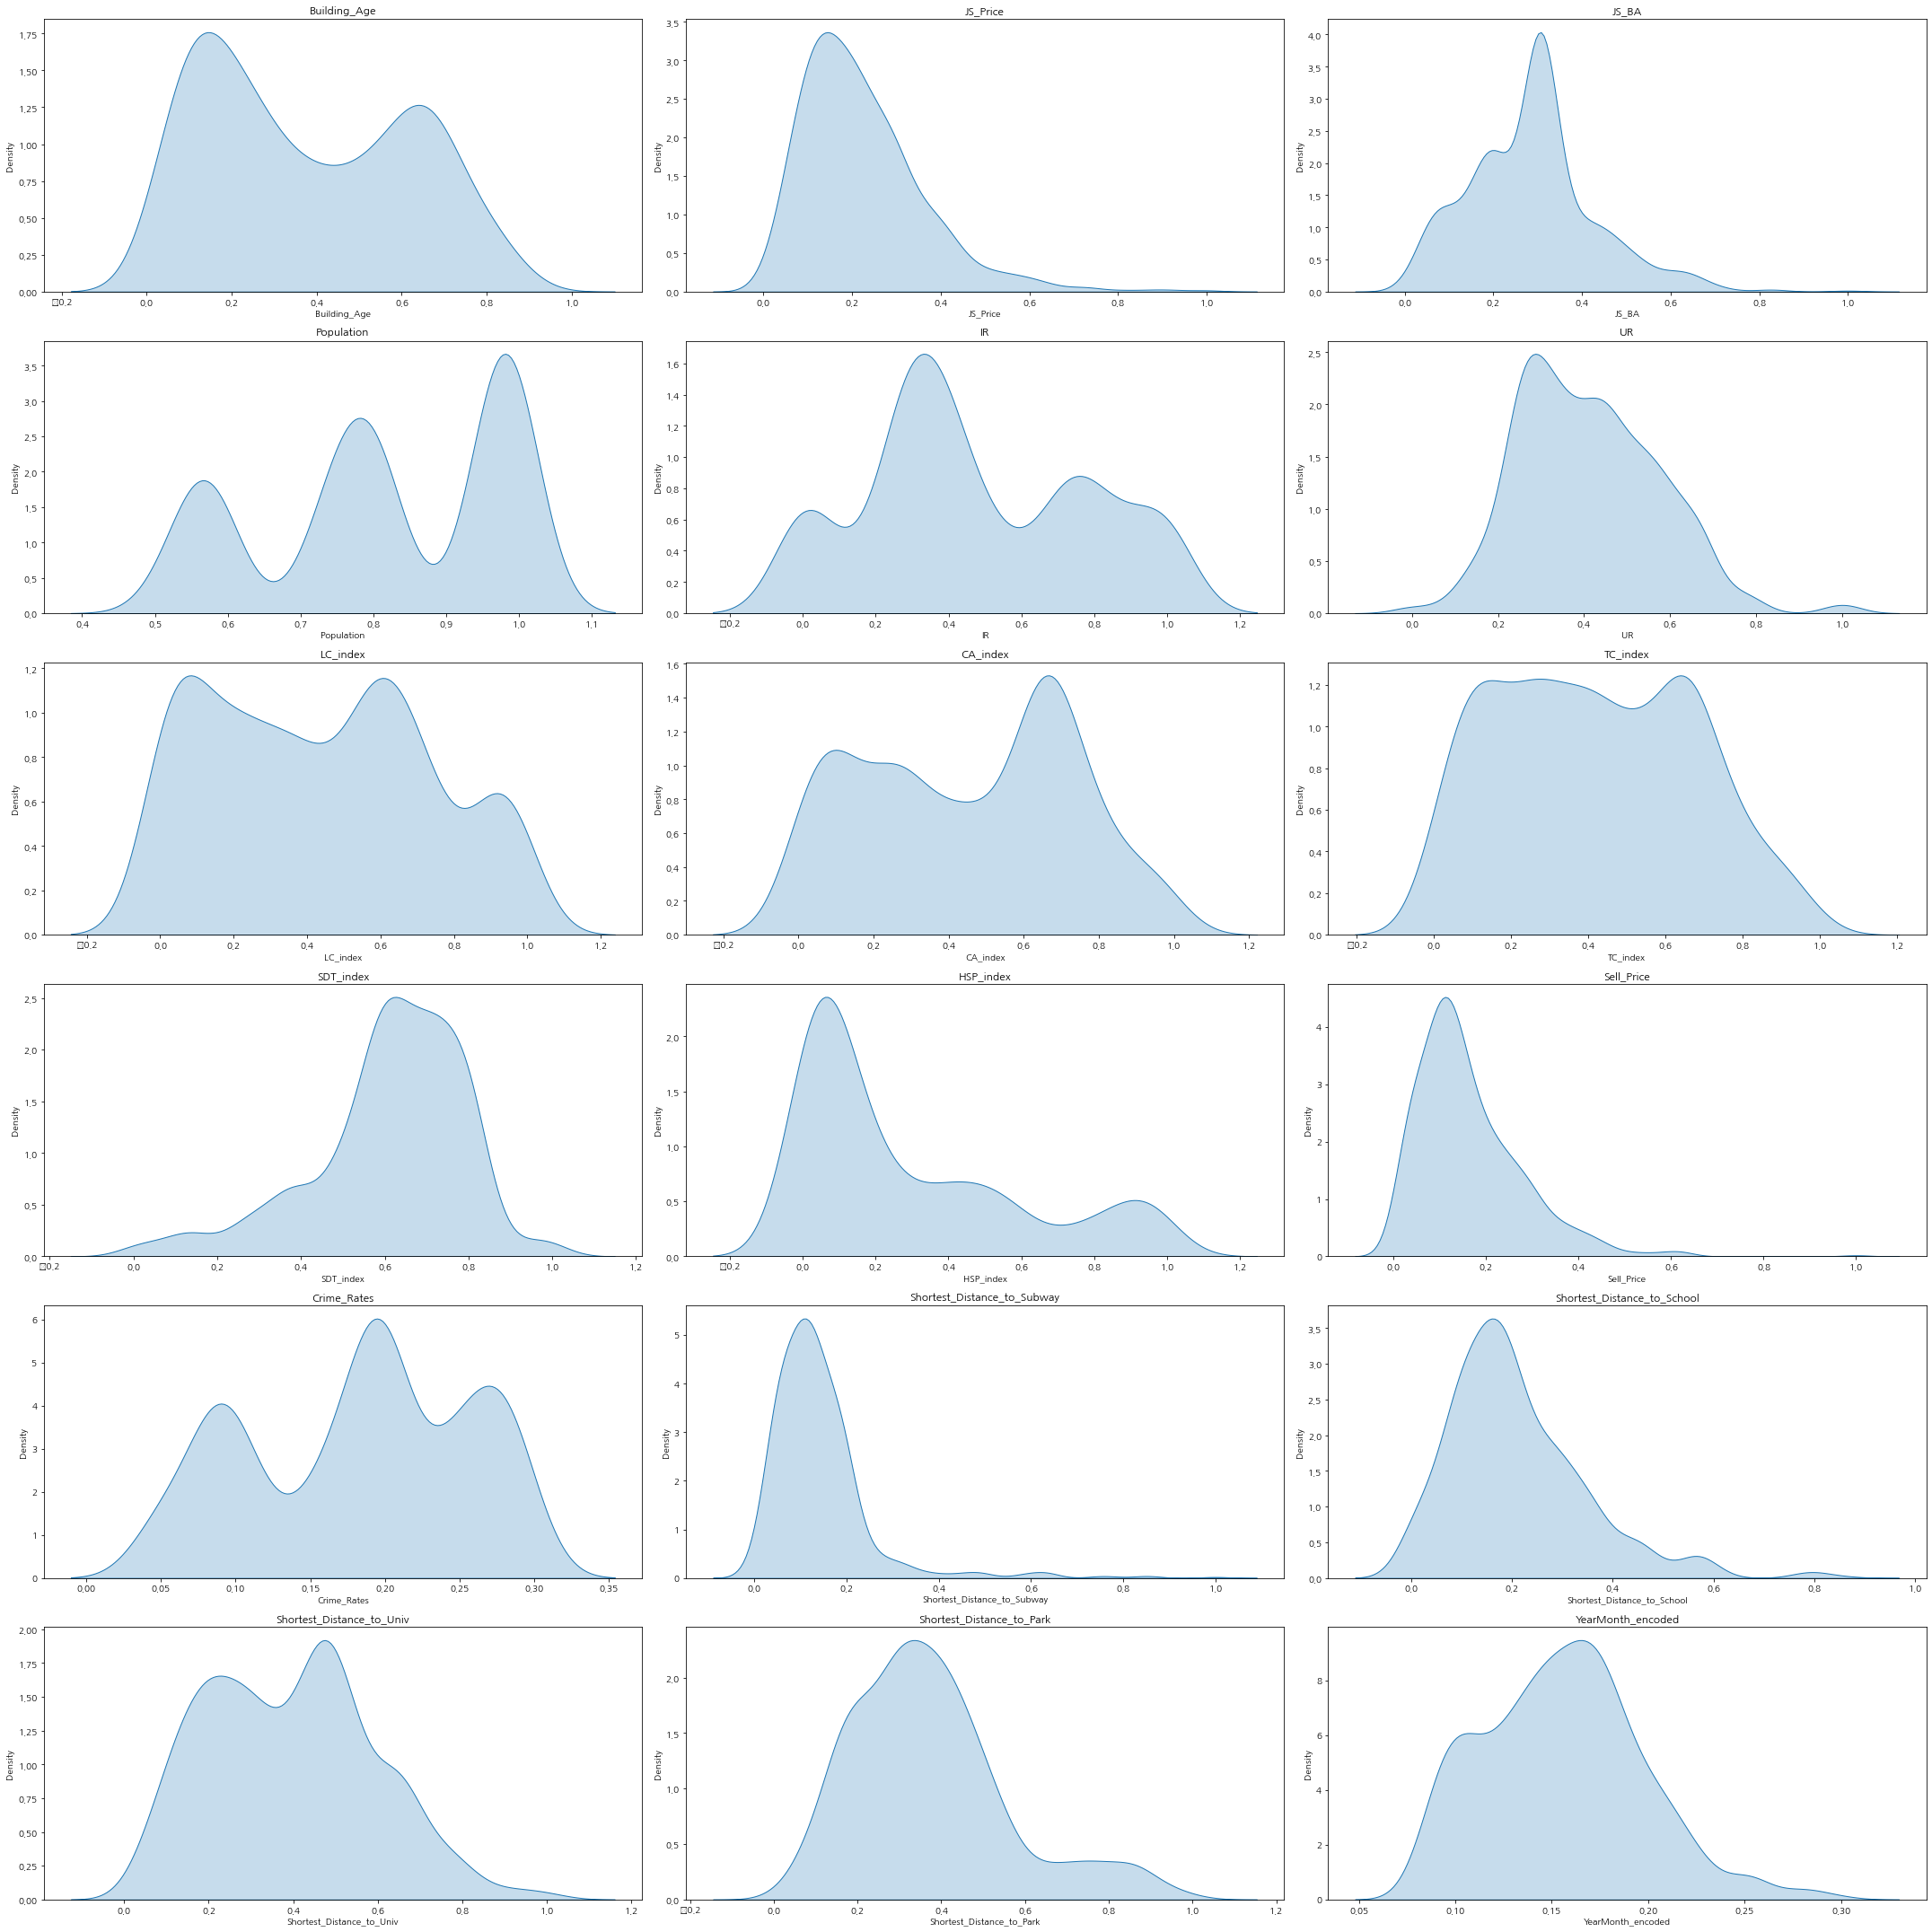

In [15]:
count = len(df_encoded.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30, 30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

# 그래프를 그릴 컬럼 목록
columns_to_plot = [column for column in df_encoded.columns]

for i, column in enumerate(columns_to_plot):
    if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
        sns.kdeplot(data=df_encoded[column], ax=ax[i], shade=True)
        ax[i].set_title(column)

# 남은 subplot 비우기
for i in range(len(columns_to_plot), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

In [16]:
for column in df_encoded.columns:
    print(f"{column}의 왜도는", scipy.stats.skew(df_encoded[column]))

Building_Age의 왜도는 0.2669876480655511
JS_Price의 왜도는 1.4584535162700047
JS_BA의 왜도는 0.700873708379659
Population의 왜도는 -0.3909149314522005
IR의 왜도는 0.2140647895715513
UR의 왜도는 0.5155828694648479
LC_index의 왜도는 0.18531170677401498
CA_index의 왜도는 -0.039029679043508236
TC_index의 왜도는 0.16237694665595462
SDT_index의 왜도는 -0.9619666173836052
HSP_index의 왜도는 1.0185162679410553
Sell_Price의 왜도는 1.6486130228902804
Crime_Rates의 왜도는 -0.23900604066822145
Shortest_Distance_to_Subway의 왜도는 3.239521910698619
Shortest_Distance_to_School의 왜도는 1.282976479494834
Shortest_Distance_to_Univ의 왜도는 0.3289621623484897
Shortest_Distance_to_Park의 왜도는 0.9191697644114609
YearMonth_encoded의 왜도는 0.42863234790107674
Building_Use_encoded의 왜도는 -2.7591727519785767


## Regression Analysis

In [17]:
df_encoded.columns

Index(['Building_Age', 'JS_Price', 'JS_BA', 'Population', 'IR', 'UR',
       'LC_index', 'CA_index', 'TC_index', 'SDT_index', 'HSP_index',
       'Sell_Price', 'Crime_Rates', 'Shortest_Distance_to_Subway',
       'Shortest_Distance_to_School', 'Shortest_Distance_to_Univ',
       'Shortest_Distance_to_Park', 'YearMonth_encoded',
       'Building_Use_encoded'],
      dtype='object')

In [18]:
# 특성 선택
selected_features = ['Sell_Price',
 'Building_Age',
 'LC_index',
 'TC_index',
 'HSP_index',
 'Building_Use_encoded',
 'Shortest_Distance_to_Subway',
 'CA_index',
 'JS_BA',
 'IR',
 'YearMonth_encoded']

# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     187.0
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          8.61e-197
Time:                        15:59:52   Log-Likelihood:                 861.60
No. Observations:                 689   AIC:                            -1699.
Df Residuals:                     677   BIC:                            -1645.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## 다중공선성

In [19]:
# X 데이터에서 상수항 제거 (VIF 계산에서 상수항은 제외해야 함)
X_without_constant = X.drop('const', axis=1)

# VIF 계산
vif = pd.DataFrame()
vif["Features"] = X_without_constant.columns
vif["VIF"] = [variance_inflation_factor(X_without_constant.values, i) for i in range(X_without_constant.shape[1])]

In [20]:
vif.sort_values(by='VIF', ascending=False)

,Features,VIF
2,LC_index,1465.699130
7,CA_index,636.971930
3,TC_index,559.181363
4,HSP_index,57.150582
5,Building_Use_encoded,45.286153
10,YearMonth_encoded,42.053809
9,IR,16.393440
8,JS_BA,8.122040
0,Sell_Price,6.214087
1,Building_Age,3.900318


- 다중공선성, 회귀분석 모델의 각 독립변수의 통계적 유의성(P>|t|값으로판단)을 고려하여 독립변수 제거하고 다시 모델 생성

In [21]:
delete_columns = ['TC_index', 'LC_index', 'IR', 'HSP_index']
selected_features = list(set(selected_features) - set(delete_columns))
selected_features

['Building_Use_encoded',
 'Building_Age',
 'JS_BA',
 'CA_index',
 'YearMonth_encoded',
 'Shortest_Distance_to_Subway',
 'Sell_Price']

In [22]:
# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     288.2
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          7.90e-199
Time:                        16:01:25   Log-Likelihood:                 855.07
No. Observations:                 689   AIC:                            -1694.
Df Residuals:                     681   BIC:                            -1658.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

- 모든 변수가 통계적으로 유의한 것을 확인할 수 있다.

## 모델가정 확인

### 선형성

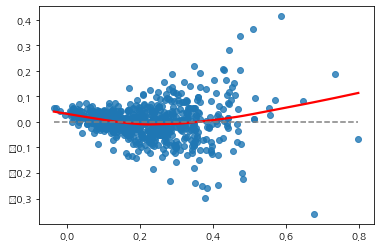

In [23]:
fitted = model.predict(X)
residual = df_encoded['JS_Price'] - fitted

sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color':'red'})

plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

### 정규성

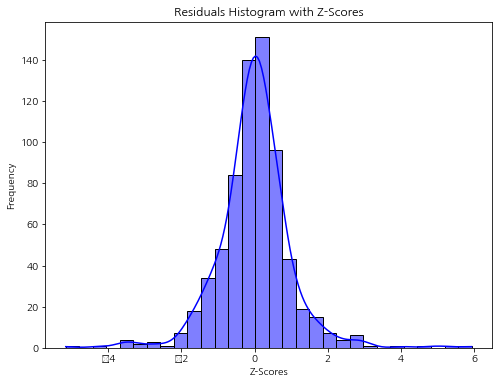

Shapiro-Wilk Test p-value: 1.24617189124163e-18


In [24]:
fitted = model.predict(X)

# 회귀분석 모델을 통해 얻은 잔차 계산
residual = df_encoded['JS_Price'] - fitted

# 잔차의 Z-score 계산
sr = stats.zscore(residual)

# Z-score를 이용한 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(sr, kde=True, bins=30, color='blue')
plt.title('Residuals Histogram with Z-Scores')
plt.xlabel('Z-Scores')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk 정규성 검정
shapiro_test = stats.shapiro(residual)
p_value = shapiro_test.pvalue
print('Shapiro-Wilk Test p-value:', p_value)

- 정규성 만족을 위해 이상치 제거한 뒤 다시 정규성 확인

In [25]:
from statsmodels.stats.outliers_influence import OLSInfluence

# 이상치 확인
cd, _ = OLSInfluence(model).cooks_distance
cd.sort_values(ascending=False).head()

2009    0.571918
51      0.095545
1762    0.082323
29      0.058573
1864    0.049523
dtype: float64

In [26]:
# Cook's 거리를 Series로 변환하고 내림차순으로 정렬
cd_series = pd.Series(cd, name="Cook's Distance")
cd_sorted = cd_series.sort_values(ascending=False)

# Cook's 거리가 가장 큰 관측치 50개의 인덱스 확인
outlier_indices = cd_sorted.head(50).index

# Cook's 거리가 큰 관측치를 데이터프레임에서 제거
df = df.drop(index=outlier_indices)

In [27]:
# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

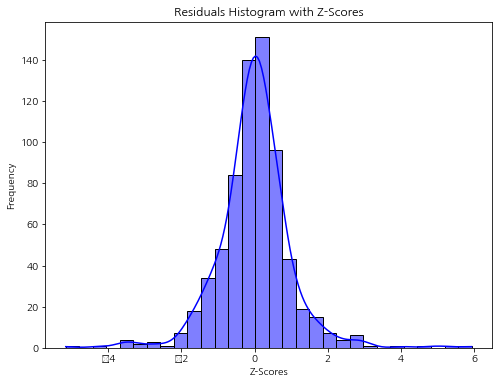

Shapiro-Wilk Test p-value: 1.24617189124163e-18


In [28]:
fitted = model.predict(X)

# 회귀분석 모델을 통해 얻은 잔차 계산
residual = df_encoded['JS_Price'] - fitted

# 잔차의 Z-score 계산
sr = stats.zscore(residual)

# Z-score를 이용한 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(sr, kde=True, bins=30, color='blue')
plt.title('Residuals Histogram with Z-Scores')
plt.xlabel('Z-Scores')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk 정규성 검정
shapiro_test = stats.shapiro(residual)
p_value = shapiro_test.pvalue
print('Shapiro-Wilk Test p-value:', p_value)

- 정규성 만족을 위해 종속변수 로그변환한 뒤 다시 정규성 확인

In [29]:
df_encoded['JS_Price'] = np.log(df_encoded['JS_Price']+1)

In [30]:
# X 데이터 선택
X = df_encoded[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df_encoded['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

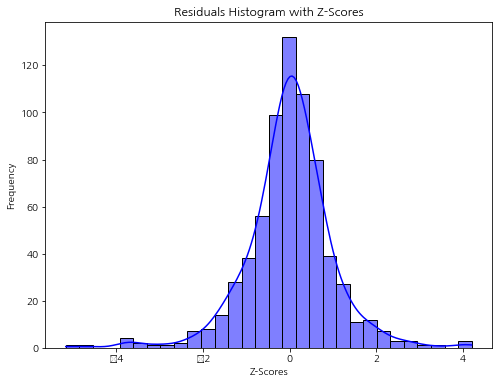

Shapiro-Wilk Test p-value: 1.7625072154379322e-15


In [31]:
fitted = model.predict(X)

# 회귀분석 모델을 통해 얻은 잔차 계산
residual = df_encoded['JS_Price'] - fitted

# 잔차의 Z-score 계산
sr = stats.zscore(residual)

# Z-score를 이용한 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(sr, kde=True, bins=30, color='blue')
plt.title('Residuals Histogram with Z-Scores')
plt.xlabel('Z-Scores')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk 정규성 검정
shapiro_test = stats.shapiro(residual)
p_value = shapiro_test.pvalue
print('Shapiro-Wilk Test p-value:', p_value)

### 등분산성

<AxesSubplot:>

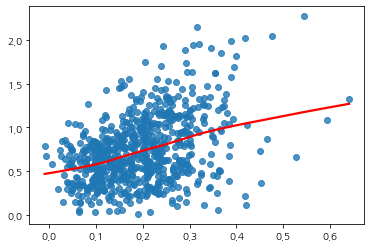

In [32]:
sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

### 독립성

In [33]:
print(model.summary().tables[2])

Omnibus:                       80.680   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              437.753
Skew:                          -0.348   Prob(JB):                     8.77e-96
Kurtosis:                       6.842   Cond. No.                         67.7


- Durbin-Watson:2.121로 1.5~2.5사이이므로 잔차 간의 자기상관이 없다고 할 수 있으며, 회귀 모델은 독립성 가정을 만족

## 최종 모델 점검

In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     319.5
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          2.32e-210
Time:                        16:02:46   Log-Likelihood:                 1062.1
No. Observations:                 689   AIC:                            -2108.
Df Residuals:                     681   BIC:                            -2072.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [35]:
model.params.sort_values(ascending=False)

Building_Use_encoded           0.485958
YearMonth_encoded              0.445634
JS_BA                          0.389936
Sell_Price                     0.330063
CA_index                       0.054103
const                         -0.063463
Shortest_Distance_to_Subway   -0.099233
Building_Age                  -0.162875
dtype: float64